In [78]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
import numpy as np

In [133]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [134]:
y_test2 = y_test.copy()

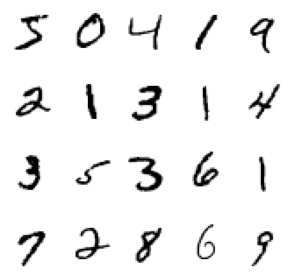

In [135]:
plt.figure(figsize=(5,5))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(x_train[i], cmap='Greys')
    plt.axis('off')
plt.show()

In [136]:
x_train.shape

(60000, 28, 28)

In [137]:
x_test.shape

(10000, 28, 28)

In [138]:
x_train = x_train.reshape(60000,784).astype('float32')
x_test = x_test.reshape(10000,784).astype('float32')

In [139]:
x_test.shape

(10000, 784)

In [140]:
x_train/=255
x_test/=255

In [141]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [142]:
n_classes = 10
y_train = keras.utils.np_utils.to_categorical(y_train, n_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, n_classes)

In [143]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [144]:
model = keras.Sequential()

In [145]:
model.add(keras.layers.Dense(64, activation = 'sigmoid', input_shape=(784,)))

In [146]:
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [147]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [148]:
model.compile(loss = 'mean_squared_error', optimizer = SGD(learning_rate = 0.01),
              metrics = ['accuracy'])

In [126]:
history = model.fit(x_train, y_train, batch_size = 70, epochs = 75, verbose = 1)

Epoch 1/75
858/858 [==============================] - 5s 5ms/step - loss: 0.0729 - accuracy: 0.5592
Epoch 2/75
858/858 [==============================] - 4s 5ms/step - loss: 0.0720 - accuracy: 0.5747
Epoch 3/75
858/858 [==============================] - 4s 5ms/step - loss: 0.0710 - accuracy: 0.5883
Epoch 4/75
858/858 [==============================] - 4s 5ms/step - loss: 0.0701 - accuracy: 0.6016
Epoch 5/75
858/858 [==============================] - 4s 5ms/step - loss: 0.0691 - accuracy: 0.6126
Epoch 6/75
858/858 [==============================] - 4s 5ms/step - loss: 0.0681 - accuracy: 0.6218
Epoch 7/75
858/858 [==============================] - 4s 5ms/step - loss: 0.0671 - accuracy: 0.6308
Epoch 8/75
858/858 [==============================] - 4s 5ms/step - loss: 0.0661 - accuracy: 0.6381
Epoch 9/75
858/858 [==============================] - 4s 5ms/step - loss: 0.0651 - accuracy: 0.6458
Epoch 10/75
858/858 [==============================] - 4s 5ms/step - loss: 0.0641 - accuracy: 0.6526

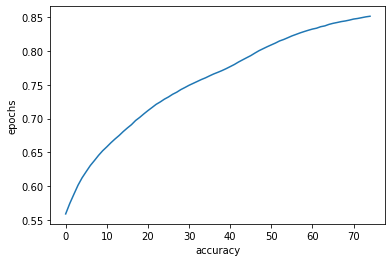

In [127]:
plt.plot(history.history['accuracy'])
plt.xlabel('accuracy')
plt.ylabel('epochs')
plt.show()

In [128]:
pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [129]:
ar = []
for a,i in enumerate(pred):
    ar.append(np.argmax(i))

In [130]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [131]:
ar = np.array(ar)

In [132]:
ar

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [101]:
from sklearn import metrics

In [149]:
print(metrics.accuracy_score(y_test2,ar))

0.8602
